# DCGAN Demo

This demo showcases the Generator and Discriminator pre-trained on the **MNIST** dataset.

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append(os.path.dirname(os.path.abspath('')))

from dcgan_mnist import Discriminator, Generator

project_root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('')))))
print(project_root)

%load_ext autoreload
%autoreload 2

d:\code\joint_project\mn914


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# load the models
G = Generator(1, 100).to(device).eval()
D = Discriminator(1).to(device).eval()

# load weights
G.load_state_dict(
    torch.load(os.path.join(project_root, 'ckpts/dcgan_generator_mnist.pth'),
               weights_only=False, map_location=device))
D.load_state_dict(
    torch.load(os.path.join(project_root, 'ckpts/dcgan_discriminator_mnist.pth'),
               weights_only=False, map_location=device))

<All keys matched successfully>

### Generate Images

torch.Size([25, 1, 28, 28])
(25, 28, 28)


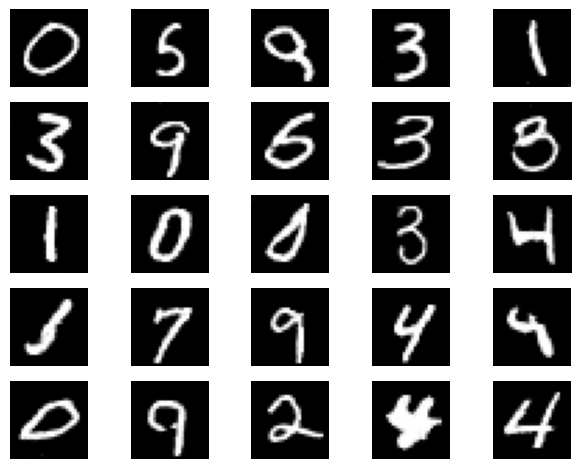

In [4]:
batch_size = 25
latent_size = 100

z = torch.randn(batch_size, latent_size, 1, 1, device=device)
fake_images = G(z)
print(fake_images.shape)
fake_images_np = fake_images.view(
    fake_images.size(0), fake_images.size(-2), fake_images.size(-1)).cpu().detach().numpy()
print(fake_images_np.shape)
fake_images_np = (fake_images_np / 2 + 0.5) * 255  # denormalize
fake_images_np = fake_images_np.astype(np.uint8)

# visualize
R, C = 5, 5
fig, axes = plt.subplots(R, C)
axes = axes.flatten()
for i in range(batch_size):
    axes[i].imshow(fake_images_np[i], cmap='gray')
    axes[i].axis('off')
fig.tight_layout()
plt.show()

### Run Discriminator

In [5]:
outputs = D(fake_images)
print(outputs.gt(0.5))

tensor([ True, False, False,  True, False, False, False, False,  True, False,
         True, False, False,  True, False, False, False,  True, False, False,
        False, False, False, False, False], device='cuda:0')
